In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-190.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)
    

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.       
len(cities)

611

In [5]:
#Starting URL for weather map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



In [6]:
#Create an empty list to hold the weather data
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval       ")
print("-------------------------------")

#Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
   
 #Run an API request for each of the cities
    try:
    #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({"City": city.title(), "Lat": city_lng, "Lng": city_lng, "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
    #If an error is experienced, skip the city
    except:
            print("City not found. Skipping...")
            continue
#Indicate the Data Loading is complete.
print("---------------------------")
print("Data Retrieval Complete    ")
print("---------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 13 | busselton
Processing Record 2 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 3 of Set 13 | eenhana
Processing Record 4 of Set 13 | yellowknife
Processing Record 5 of Set 13 | rikitea
Processing Record 6 of Set 13 | camacha
Processing Record 7 of Set 13 | punta arenas
Processing Record 8 of Set 13 | hobart
Processing Record 9 of Set 13 | barrow
Processing Record 10 of Set 13 | alamosa
Processing Record 11 of Set 13 | longyearbyen
Processing Record 12 of Set 13 | kapaa
Processing Record 13 of Set 13 | mataura
Processing Record 14 of Set 13 | ushuaia
Processing Record 15 of Set 13 | faya
Processing Record 16 of Set 13 | pevek
Processing Record 17 of Set 13 | springville
Processing Record 18 of Set 13 | fortuna
Processing Record 19 of Set 13 | albany
Processing Record 20 of Set 13 | ust-kuyga
Processing Record 21 of Set 13 | vardo
Processing Record 22 of Set 13 | kodiak
Pr

Processing Record 36 of Set 16 | son la
Processing Record 37 of Set 16 | codrington
Processing Record 38 of Set 16 | olinda
Processing Record 39 of Set 16 | belushya guba
City not found. Skipping...
Processing Record 40 of Set 16 | saleaula
City not found. Skipping...
Processing Record 41 of Set 16 | bilma
Processing Record 42 of Set 16 | hirara
Processing Record 43 of Set 16 | esperance
Processing Record 44 of Set 16 | arraial do cabo
Processing Record 45 of Set 16 | kedrovyy
Processing Record 46 of Set 16 | chuy
Processing Record 47 of Set 16 | sola
Processing Record 48 of Set 16 | ostrovnoy
Processing Record 49 of Set 16 | quesnel
Processing Record 50 of Set 16 | samusu
City not found. Skipping...
Processing Record 1 of Set 17 | batemans bay
Processing Record 2 of Set 17 | kuytun
Processing Record 3 of Set 17 | eldikan
City not found. Skipping...
Processing Record 4 of Set 17 | klaksvik
Processing Record 5 of Set 17 | joao camara
Processing Record 6 of Set 17 | lubango
Processing Re

Processing Record 21 of Set 20 | caravelas
Processing Record 22 of Set 20 | kloulklubed
Processing Record 23 of Set 20 | praia da vitoria
Processing Record 24 of Set 20 | naze
Processing Record 25 of Set 20 | huarmey
Processing Record 26 of Set 20 | makakilo city
Processing Record 27 of Set 20 | kisangani
Processing Record 28 of Set 20 | howard springs
Processing Record 29 of Set 20 | ewa beach
Processing Record 30 of Set 20 | el balyana
City not found. Skipping...
Processing Record 31 of Set 20 | chulman
Processing Record 32 of Set 20 | valverde del camino
Processing Record 33 of Set 20 | novaya bryan
Processing Record 34 of Set 20 | ancud
Processing Record 35 of Set 20 | pokhvistnevo
Processing Record 36 of Set 20 | yangjiang
Processing Record 37 of Set 20 | quirinopolis
Processing Record 38 of Set 20 | ludvika
Processing Record 39 of Set 20 | orshanka
Processing Record 40 of Set 20 | adrar
Processing Record 41 of Set 20 | tadine
Processing Record 42 of Set 20 | georgetown
Processing

Processing Record 4 of Set 24 | lucapa
Processing Record 5 of Set 24 | cayenne
Processing Record 6 of Set 24 | ust-nera
Processing Record 7 of Set 24 | muscat
Processing Record 8 of Set 24 | grand gaube
Processing Record 9 of Set 24 | petropavlovsk-kamchatskiy
Processing Record 10 of Set 24 | kihei
Processing Record 11 of Set 24 | warrington
Processing Record 12 of Set 24 | kyshtovka
Processing Record 13 of Set 24 | nantucket
Processing Record 14 of Set 24 | san carlos de bariloche
Processing Record 15 of Set 24 | mullaitivu
City not found. Skipping...
Processing Record 16 of Set 24 | komsomolskiy
Processing Record 17 of Set 24 | gobabis
Processing Record 18 of Set 24 | glenwood springs
Processing Record 19 of Set 24 | tumannyy
City not found. Skipping...
Processing Record 20 of Set 24 | shaoguan
Processing Record 21 of Set 24 | new richmond
Processing Record 22 of Set 24 | areka
Processing Record 23 of Set 24 | vizinga
Processing Record 24 of Set 24 | tsihombe
City not found. Skipping

In [7]:
len(city_data)

551

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,115.33,115.33,63.00,97,98,12.15,AU,2020-07-28 04:07:31
1,Eenhana,16.33,16.33,50.29,47,0,8.46,NA,2020-07-28 04:07:31
2,Yellowknife,-114.35,-114.35,66.20,77,75,4.70,CA,2020-07-28 04:07:31
3,Rikitea,-134.97,-134.97,72.46,82,96,17.69,PF,2020-07-28 04:07:31
4,Camacha,-16.33,-16.33,69.80,73,40,12.75,PT,2020-07-28 04:07:31
5,Punta Arenas,-70.92,-70.92,35.60,64,65,17.22,CL,2020-07-28 04:07:32
6,Hobart,147.33,147.33,54.00,66,75,2.24,AU,2020-07-28 04:07:30
7,Barrow,-156.79,-156.79,39.20,80,90,19.46,US,2020-07-28 04:06:53
8,Alamosa,-105.87,-105.87,55.40,100,90,10.29,US,2020-07-28 04:07:32
9,Longyearbyen,15.64,15.64,64.40,48,99,11.41,SJ,2020-07-28 04:07:32


In [9]:
city_data_order =["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data_df = city_data_df[city_data_order]
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,98,AU,2020-07-28 04:07:31,97,115.33,115.33,63.00,12.15
1,Eenhana,0,NA,2020-07-28 04:07:31,47,16.33,16.33,50.29,8.46
2,Yellowknife,75,CA,2020-07-28 04:07:31,77,-114.35,-114.35,66.20,4.70
3,Rikitea,96,PF,2020-07-28 04:07:31,82,-134.97,-134.97,72.46,17.69
4,Camacha,40,PT,2020-07-28 04:07:31,73,-16.33,-16.33,69.80,12.75


In [10]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [11]:
# Extract relevant fields from the Data Frame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [12]:
#Import the time module
import time
#Get today's date in deconds
today = time.time()
today

1595909356.1784782

In [13]:
today = time.strftime("%x")
today

'07/27/20'

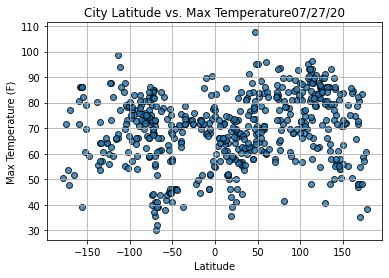

In [14]:
#Build the scatter plot for latitude vs. max temp
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidth=1, marker="o",
            alpha=0.8, label="Cities")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


#Save the figure
plt.savefig("weather_data/Fig1.png")
#Show plot
plt.show()

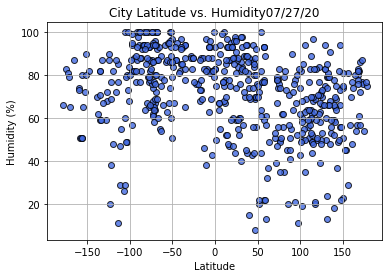

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidth=1, marker="o",
            alpha=0.8, label="Cities", color="royalblue")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")
#Show plot
plt.show()

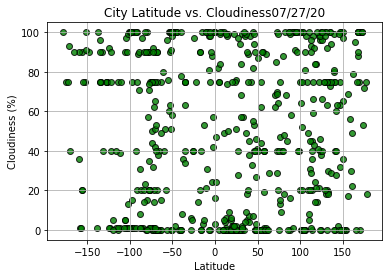

In [16]:
# Build the scatter plots for latitude vs. Cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidth=1, marker="o",
            alpha=0.8, label="Cities", color="green")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")
#Show plot
plt.show()

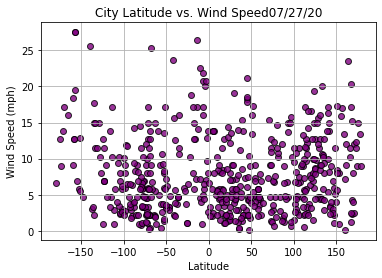

In [17]:
# Build the scatter plots for latitude vs. Wind Speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidth=1, marker="o",
            alpha=0.8, label="Cities", color="purple")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")
#Show plot
plt.show()

In [23]:
#filter the data
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
546     True
547     True
548    False
549     True
550     True
Name: Lat, Length: 551, dtype: bool

In [22]:
index13 = city_data_df.loc[13]
index13

City                         Faya
Cloudiness                     75
Country                        SA
Date          2020-07-28 04:07:33
Humidity                       87
Lat                         42.45
Lng                         42.45
Max Temp                     62.6
Wind Speed                   7.34
Name: 13, dtype: object

In [64]:
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [65]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

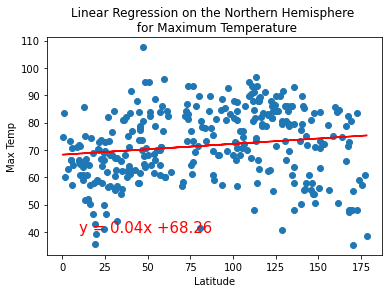

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

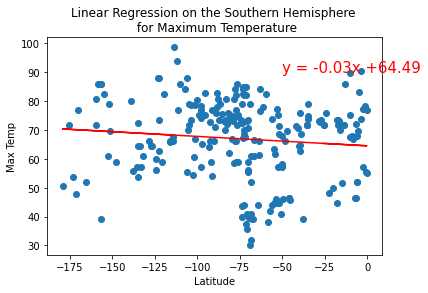

In [67]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', "Max Temp",(-50,90))

In [56]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

-0.10263848142653469


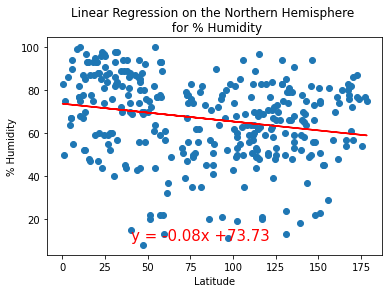

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

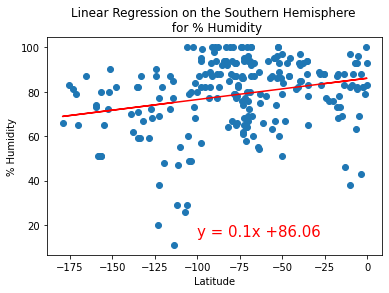

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-100,15))

In [78]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.2515025360394582


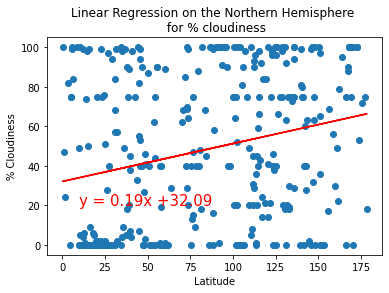

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
#Call the fcn
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % cloudiness', '% Cloudiness', (10,20))


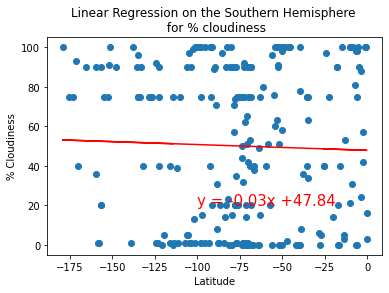

In [83]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
#Call the fcn
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % cloudiness', '% Cloudiness', (-100,20))


In [93]:
linregress(x_values, y_values)
print(r_value)

LinregressResult(slope=-0.0054488005325126964, intercept=7.608531258339392, rvalue=-0.03987962007057342, pvalue=0.5491077179285057, stderr=0.00908134250573901)


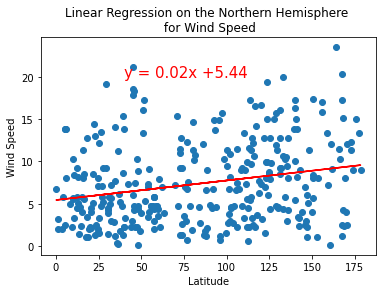

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
#Call the fcn
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (40,20))


In [95]:
linregress(x_values, y_values)


LinregressResult(slope=0.023114204185856323, intercept=5.441646099519355, rvalue=0.23929315694820819, pvalue=1.3784055147531145e-05, stderr=0.005234700480838758)

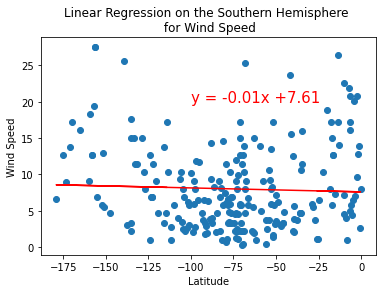

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
#Call the fcn
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-100,20))


In [92]:
linregress(x_values, y_values)


LinregressResult(slope=-0.0054488005325126964, intercept=7.608531258339392, rvalue=-0.03987962007057342, pvalue=0.5491077179285057, stderr=0.00908134250573901)